# 🍷 Wine Quality Prediction – Internship Task (Day 1 to Day 5)




In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📅 DAY 1 – Data Understanding & Exploration

In [3]:
import pandas as pd

# Load Wine Quality dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=';')

# Verify data
print(df.shape)
df.head()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Statistical summary of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Answering analysis questions
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print('Features:', df.columns.tolist())
print('Target column: quality')
print('Max alcohol:', df['alcohol'].max())
print('Min alcohol:', df['alcohol'].min())
print('Average pH:', df['pH'].mean())
print('Highest quality:', df['quality'].max())
print('Lowest quality:', df['quality'].min())

Rows: 1599
Columns: 12
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Target column: quality
Max alcohol: 14.9
Min alcohol: 8.4
Average pH: 3.3111131957473416
Highest quality: 8
Lowest quality: 3


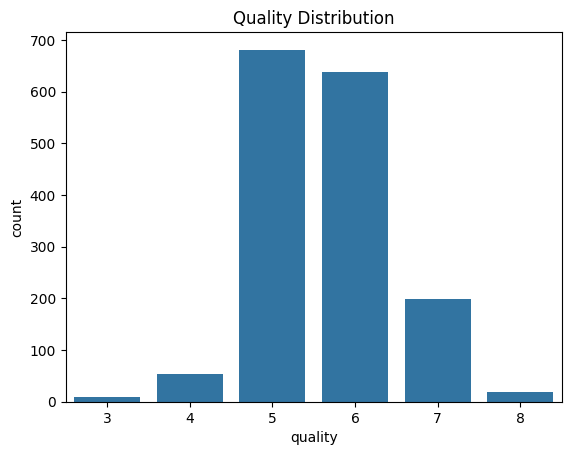

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df)
plt.title("Quality Distribution")
plt.show()


### ✍️ Explanation (Day 1)
- This dataset contains chemical properties of red wine.
- `quality` is the target variable.
- Initially it is a regression problem, later converted into classification.
- On Day 1, I focused on understanding the dataset. I loaded the Wine Quality dataset using pandas and examined the first 10 rows to understand its structure. I used the info() function to check data types and the describe() function to analyze the statistical summary of the features.

## 📅 DAY 2 – Preprocessing & Target Creation

In [8]:
# Check for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


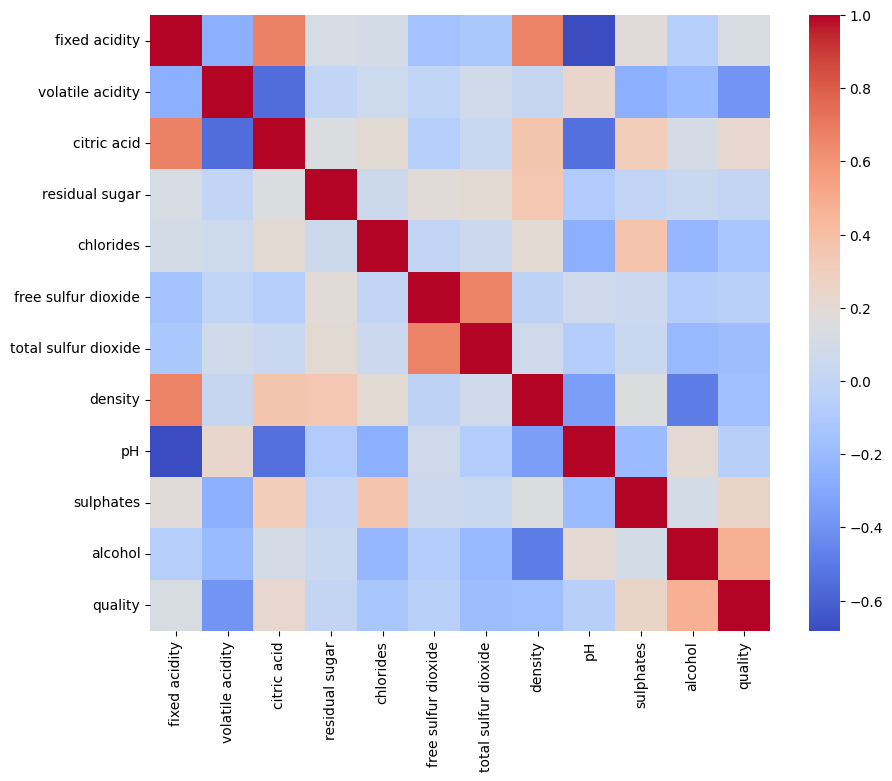

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [10]:
# Correlation with quality
df.corr()['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [11]:
# Convert quality into binary classification
# GOOD (1): quality >= 7
# BAD (0): quality < 7
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df[['quality', 'quality_label']].head()

,quality,quality_label
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0


quality                 1.000000
quality_label           0.710196
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


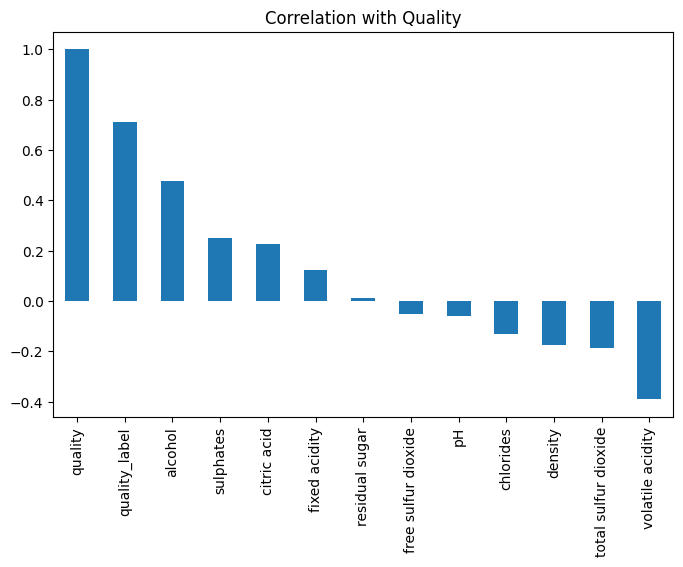

In [12]:
correlation = df.corr()['quality'].sort_values(ascending=False)
print(correlation)

correlation.plot(kind='bar', figsize=(8,5))
plt.title("Correlation with Quality")
plt.show()


### ✍️ Explanation (Day 2)
- Binary conversion simplifies real-world decision making.
- Makes the problem suitable for classification algorithms.

## 📅 DAY 3 – Model Building (Without Scaling)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [14]:
# Feature and target separation
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
import pandas as pd

# Load Wine Quality dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=';')

# Verify data
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# Convert quality into binary classification
# GOOD (1): quality >= 7
# BAD (0): quality < 7
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df[['quality', 'quality_label']].head()

,quality,quality_label
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0


In [17]:
# Feature and target separation
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [18]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [19]:
# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8645833333333334
Precision: 0.53125
Recall: 0.2537313432835821
F1 Score: 0.3434343434343434
Confusion Matrix:
 [[398  15]
 [ 50  17]]


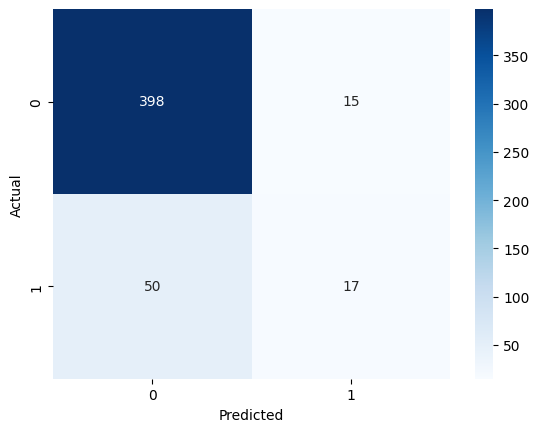

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


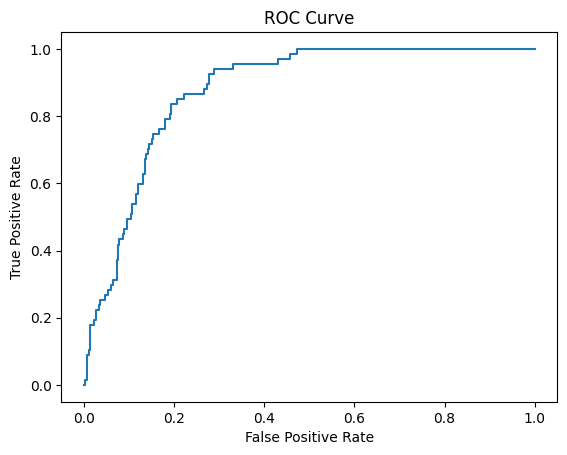

AUC Score: 0.8767662896172889


In [21]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc)


### ✍️ Explanation (Day 3)
- Precision shows correctness of GOOD predictions.
- Recall shows how many GOOD wines are detected.
- False Positive: BAD wine predicted as GOOD.
- False Negative: GOOD wine predicted as BAD.

## 📅 DAY 4 – Scaling & Model Comparison

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Logistic Regression (Scaled)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [25]:
# KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

In [26]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, lr_pred)
acc_knn = accuracy_score(y_test, knn_pred)
acc_dt = accuracy_score(y_test, dt_pred)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [acc_lr, acc_knn, acc_dt]
       })

### ✍️ Explanation (Day 4)
- Scaling improves distance-based models like KNN.
- Decision Tree handles non-linear patterns well.

## 📅 DAY 5 – Hyperparameter Tuning & Prediction System

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Final Accuracy: 0.8666666666666667
Confusion Matrix:
 [[380  33]
 [ 31  36]]


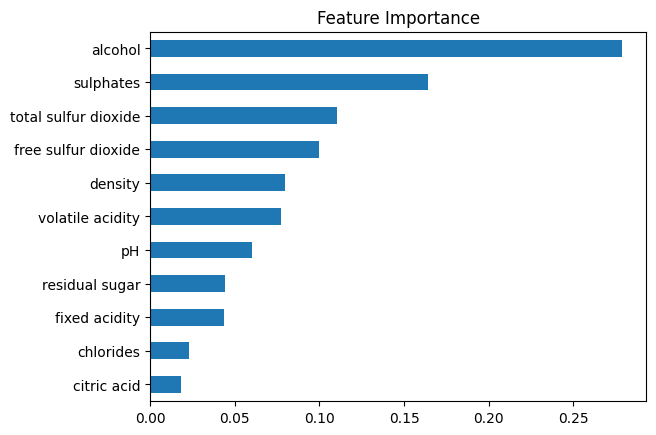

In [29]:
# Best parameters
print('Best Parameters:', grid.best_params_)

best_model = grid.best_estimator_
y_best = best_model.predict(X_test_scaled)

print('Final Accuracy:', accuracy_score(y_test, y_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_best))

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [30]:
# Prediction function
def predict_wine_quality(input_data):
    input_scaled = scaler.transform([input_data])
    pred = best_model.predict(input_scaled)
    return 'GOOD Wine 🍷' if pred[0] == 1 else 'BAD Wine ❌'

# Example prediction
predict_wine_quality(X.iloc[0].values)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'BAD Wine ❌'